In [16]:
import tensorflow as tf
import numpy as np

# 시퀸스 예측 데이터 생성
X = []
Y = []

for i in range(6):
    # [0, 1, 2, 3], [1, 2, 3, 4] 같은 정수의 시퀸스를 만든다.
    lst = list(range(i, i + 4))
    
    # 위에서 구한 시퀀스의 숫자들을 각각 10으로 나눈 다음 저장합니다.
    # SimpleRNN에 각 타임스탭에 하나씩 숫자가 들어가기 때문에 여기서도 하나씩 분리해서 배열에 저장합니다.
    X.append(list(map(lambda c: [c/10], lst)))
    
    # 정답에 해당하는 4, 5 등의 정수 역시 앞에서처럼 10으로 나눠서 저장합니다.
    Y.append((i + 4) / 10)
    
X = np.array(X)
Y = np.array(Y)

for i in range(len(X)):
    print(X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9


In [17]:
# 시퀀스 예측 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=[4, 1]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [18]:
# 7.4 네트워크 훈련 및 결과 확인
model.fit(X, Y, epochs=100, verbose=0)
print(model.predict(X))

[[0.35707438]
 [0.51856714]
 [0.6431743 ]
 [0.7339688 ]
 [0.79847395]
 [0.84392637]]


In [19]:
# 7.6 곱셈 문제 데이터 생성
X = []
Y = []

for i in range(3000):
    # 0 ~ 1 범위의 랜더한 숫자 100개를 만듭니다.
    lst = np.random.rand(100)
    
    # 마킹할 숫자 2개의 인덱스를 뽑습니다
    idx = np.random.choice(100, 2, replace=False)
    
    # 마킹 인덱스가 저장된 원-핫 인코딩 벡터를 만듭니다.
    zeros = np.zeros(100)
    zeros[idx] = 1
    
    # 마킹 인덱스와 랜덤한 숫자를 합쳐서 X에 저장합니다.
    X.append(np.array(list(zip(zeros, lst))))
    Y.append(np.prod(lst[idx]))
    
print(X[0], Y[0])

[[0.         0.33148544]
 [0.         0.15086207]
 [0.         0.30003279]
 [0.         0.3726504 ]
 [0.         0.99016967]
 [0.         0.14816155]
 [0.         0.12177995]
 [0.         0.86155949]
 [0.         0.51770458]
 [0.         0.05308237]
 [0.         0.67606939]
 [0.         0.56395471]
 [0.         0.16167793]
 [0.         0.03033718]
 [0.         0.26388758]
 [0.         0.13545243]
 [0.         0.06181679]
 [0.         0.47001032]
 [0.         0.17201488]
 [0.         0.39022968]
 [0.         0.04599436]
 [0.         0.06407127]
 [0.         0.24442177]
 [0.         0.67252542]
 [0.         0.41709144]
 [0.         0.8792798 ]
 [0.         0.51242859]
 [0.         0.3076852 ]
 [0.         0.65551648]
 [0.         0.98152487]
 [0.         0.36101335]
 [0.         0.31345765]
 [0.         0.09549738]
 [0.         0.2335475 ]
 [0.         0.549207  ]
 [0.         0.39119091]
 [0.         0.56751579]
 [0.         0.40612702]
 [0.         0.60307153]
 [0.         0.4580585 ]


In [21]:
# 7.7 SimpleRNN 레이어를 이용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100, 2]),
    tf.keras.layers.SimpleRNN(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
# 7.8 SimpleRUNN 네트워크 학습
X = np.array(X)
Y = np.array(Y)

# 2560개의 데이터만 학습시킵니다. 검증 데이터는 20%로 지정합니다.
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0751 - val_loss: 0.0546
Epoch 2/100
2048/2048 [==============================] - 5s 2ms/sample - loss: 0.0504 - val_loss: 0.0548
Epoch 3/100
2048/2048 [==============================] - 5s 2ms/sample - loss: 0.0498 - val_loss: 0.0555
Epoch 4/100
2048/2048 [==============================] - 5s 2ms/sample - loss: 0.0506 - val_loss: 0.0559
Epoch 5/100
2048/2048 [==============================] - 5s 2ms/sample - loss: 0.0493 - val_loss: 0.0536
Epoch 6/100
2048/2048 [==============================] - 5s 2ms/sample - loss: 0.0501 - val_loss: 0.0539
Epoch 7/100
2048/2048 [==============================] - 5s 3ms/sample - loss: 0.0503 - val_loss: 0.0547
Epoch 8/100
2048/2048 [==============================] - 5s 3ms/sample - loss: 0.0494 - val_loss: 0.0538
Epoch 9/100
2048/2048 [==============================] - 5s 3ms/sample - loss: 0.0490 - val_loss: 0.0536
Epoch 10

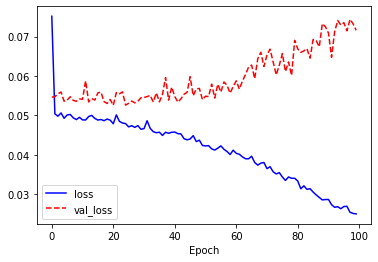

In [23]:
# 7.9 SimpleRNN 네트워크 학습 결과 확인
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [26]:
# 7.10 테스트 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560 + 5])

# 5개 테스트 데이터에 대한 예측을 표시합니다.
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
fail = 0

for i in range(len(prediction)):
    # 오차가 0.04 이상이면 오답입니다.
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        fail += 1
        
print('correctness:', (440 - fail) / 440 * 100, '%')

440/440 [==============================] - 0s 557us/sample - loss: 0.0687
0.4172722575489491 	 0.16432165 	diff: 0.2529506114546269
0.550764080386531 	 0.48687515 	diff: 0.06388893375910487
0.2721397218184967 	 0.111153275 	diff: 0.16098644704394532
0.045857670634118844 	 0.35608658 	diff: 0.3102289113113005
0.08832420134095136 	 0.40174899 	diff: 0.3134247837111574
correctness: 11.136363636363637 %


In [27]:
# 7.11 LSTM 레이어를 이용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100, 2]),
    tf.keras.layers.LSTM(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 30)           3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [28]:
# 7.12 LSTM 네트워크 학습
X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 5s 3ms/sample - loss: 0.0531 - val_loss: 0.0534
Epoch 2/100
2048/2048 [==============================] - 1s 294us/sample - loss: 0.0485 - val_loss: 0.0537
Epoch 3/100
2048/2048 [==============================] - 1s 302us/sample - loss: 0.0488 - val_loss: 0.0534
Epoch 4/100
2048/2048 [==============================] - 1s 292us/sample - loss: 0.0488 - val_loss: 0.0545
Epoch 5/100
2048/2048 [==============================] - 1s 294us/sample - loss: 0.0487 - val_loss: 0.0535
Epoch 6/100
2048/2048 [==============================] - 1s 302us/sample - loss: 0.0492 - val_loss: 0.0538
Epoch 7/100
2048/2048 [==============================] - 1s 300us/sample - loss: 0.0489 - val_loss: 0.0536
Epoch 8/100
2048/2048 [==============================] - 1s 302us/sample - loss: 0.0483 - val_loss: 0.0545
Epoch 9/100
2048/2048 [==============================] - 1s 307us/sample - loss: 0.0487 - val_loss:

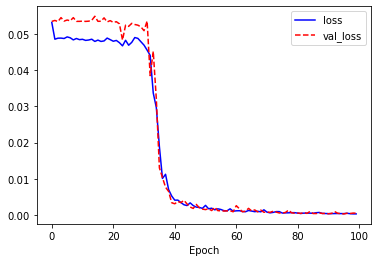

In [29]:
# 7.13 LSTM 네트워크의 학습 결과 확인
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], '-b', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [30]:
# 7.14 테스트 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560 + 5])

# 5개 테스트 데이터에 대한 예측을 표시합니다.
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
cnt = 0

for i in range(len(prediction)):
    # 오차가 0.04 이상이면 오답입니다.
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        cnt += 1
        
print('correctness:', (440 - cnt) / 440 * 100, '%')

440/440 [==============================] - 1s 2ms/sample - loss: 4.1459e-04
0.4172722575489491 	 0.4501093 	diff: 0.03283704544864002
0.550764080386531 	 0.59133744 	diff: 0.04057336201154027
0.2721397218184967 	 0.26136547 	diff: 0.010774248548080456
0.045857670634118844 	 0.042166922 	diff: 0.003690748392669488
0.08832420134095136 	 0.07334372 	diff: 0.014980484779157074
correctness: 94.0909090909091 %


In [31]:
# 7.15 GRU 레이어를 이용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.GRU(units=30, return_sequences=True, input_shape=[100, 2]),
    tf.keras.layers.GRU(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100, 30)           3060      
_________________________________________________________________
gru_1 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 31        
Total params: 8,671
Trainable params: 8,671
Non-trainable params: 0
_________________________________________________________________


In [32]:
X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 3s 2ms/sample - loss: 0.0556 - val_loss: 0.0535
Epoch 2/100
2048/2048 [==============================] - 1s 300us/sample - loss: 0.0493 - val_loss: 0.0558
Epoch 3/100
2048/2048 [==============================] - 1s 301us/sample - loss: 0.0495 - val_loss: 0.0542
Epoch 4/100
2048/2048 [==============================] - 1s 300us/sample - loss: 0.0492 - val_loss: 0.0532
Epoch 5/100
2048/2048 [==============================] - 1s 294us/sample - loss: 0.0490 - val_loss: 0.0534
Epoch 6/100
2048/2048 [==============================] - 1s 302us/sample - loss: 0.0487 - val_loss: 0.0533
Epoch 7/100
2048/2048 [==============================] - 1s 292us/sample - loss: 0.0489 - val_loss: 0.0553
Epoch 8/100
2048/2048 [==============================] - 1s 292us/sample - loss: 0.0491 - val_loss: 0.0529
Epoch 9/100
2048/2048 [==============================] - 1s 293us/sample - loss: 0.0483 - val_loss:

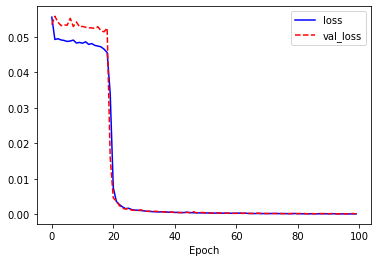

In [33]:
# 7.17 GRU 네트워크의 학습 확인
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], '-b', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [34]:
# 7.18 테스트 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560 + 5])

# 5개 테스트 데이터에 대한 예측을 표시합니다.
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
cnt = 0

for i in range(len(prediction)):
    # 오차가 0.04 이상이면 오답입니다.
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        cnt += 1
        
print('correctness:', (440 - cnt) / 440 * 100, '%')

440/440 [==============================] - 1s 1ms/sample - loss: 9.9058e-05
0.4172722575489491 	 0.41403624 	diff: 0.0032360133949726477
0.550764080386531 	 0.53869635 	diff: 0.012067731719386243
0.2721397218184967 	 0.2664718 	diff: 0.005667918630172741
0.045857670634118844 	 0.049144328 	diff: 0.0032866570064146033
0.08832420134095136 	 0.086871624 	diff: 0.0014525773480314336
correctness: 99.31818181818181 %
